In [20]:
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [3]:
# Features and target attribute
X = digits.images
y = digits.target

In [4]:
print('Feature Shape: ', X.shape) # Each image is 8 x 8 pixel = 64 pixels and total # is 1797
print('Target Shape: ', y.shape)

Feature Shape:  (1797, 8, 8)
Target Shape:  (1797,)


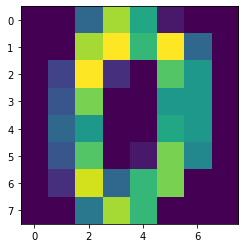

In [5]:
# Visualize the image
plt.imshow(X[0])
plt.show()

In [6]:
# sklean models accept the 2D array for training
X = X.reshape(X.shape[0], -1)
print(X.shape)

(1797, 64)


In [7]:
# Split Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
clf = LogisticRegression()

In [9]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [10]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [11]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
# Measure the model performance
# There are many metrics like precision, recall, F1 score, ROC curve etc to measure the model performance.
# 

In [13]:
# Use score method to get accuracy of the model.
score = clf.score(X_test, y_test)
print('Score: ',score)

Score:  0.9740740740740741


In [14]:
# Predict
predictions = clf.predict(X_test)

In [15]:
# Confusion Matrix for showing model performance
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[45  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  2  0]
 [ 0  1 52  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  1  0]
 [ 0  0  0  0 48  0  0  0  0  0]
 [ 0  0  0  0  0 55  1  0  0  1]
 [ 0  1  0  0  0  0 59  0  0  0]
 [ 0  0  0  0  1  0  0 52  0  0]
 [ 0  3  1  0  0  0  0  0 56  1]
 [ 0  0  0  0  0  1  0  0  0 56]]


In [1]:
# Using seaborn to make pretty confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Accuracy Score: ',score)

NameError: name 'plt' is not defined

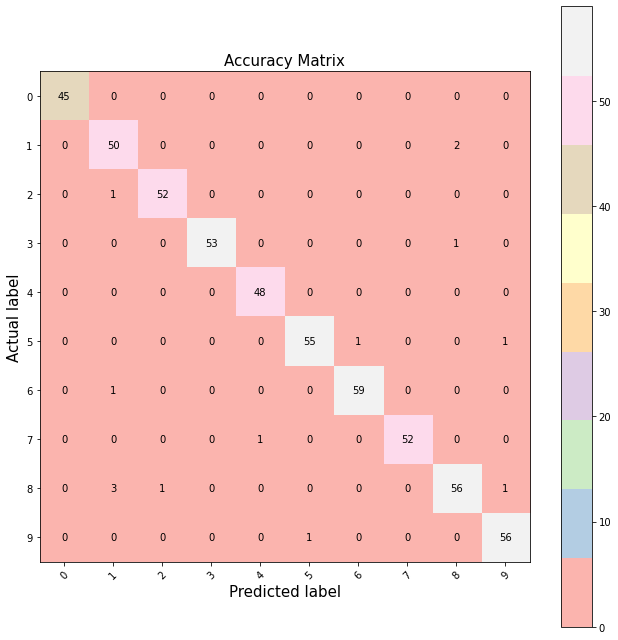

In [22]:
# Confusion Matrix using matplotlib
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Accuracy Matrix', size=15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), horizontalalignment='center',verticalalignment='center')

7 4
6 1
8 1
9 5
5 9
8 1
1 8
1 8
8 2
3 8
8 1
8 9
5 6
2 1


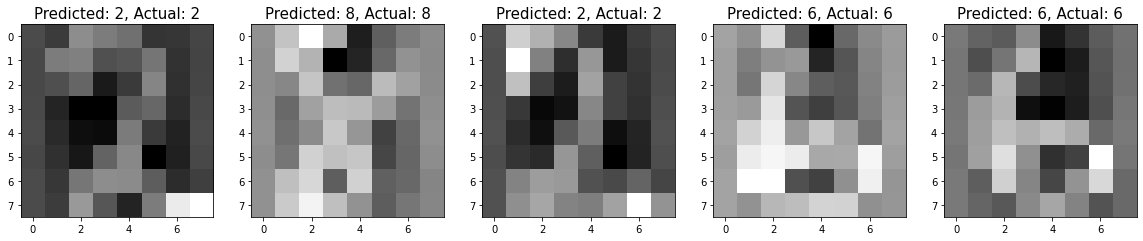

In [30]:
# Showing Misclassified images
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict:
        print(label, predict)
        misclassifiedIndexes.append(index)
        index +=1
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), fontsize = 15)